# Crop Yield Prediction
### Md. Rubel Rana 1712661642
### Navid Al - Musabbir 1721853042

In [1]:
import graphviz
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio
import plotly.express as px
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy import stats
import autosklearn.regression
import autogluon.core as ag
from tpot import TPOTRegressor

from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe

import autosklearn
import sklearn.metrics

from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

from autosklearn.classification import AutoSklearnClassifier


from supervised.automl import AutoML
from supervised.preprocessing.eda import EDA

from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.metrics import accuracy_score


WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [2]:
# Dataset
dataset = 'dataset/Potato/potato.csv'

In [3]:
# Load dataset into dataframe
data = pd.read_csv(dataset)

## Data Exploration

In [4]:
data.shape

(686, 13)

In [5]:
data.columns

Index(['District', 'Area', 'Year', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Humidity', 'Wind', 'Cloud', 'Sunshine', 'ALT', 'Productions', 'PPH'],
      dtype='object')

In [6]:
data.head()

District   Area  Year  Max_Temp  Min_Temp  Rainfall  Humidity  Wind  Cloud  \
0         2  21880  1969    30.750    14.100      8.00     70.50   0.6  1.575   
1         4  22510  1969    31.400    16.950     14.00     76.25   0.3  0.700   
2         5  38940  1969    30.025    14.775      6.50     69.25   0.6  1.875   
3         6  16465  1969    28.975    13.250     24.50     73.50   0.2  0.600   
4         7   2490  1969    28.900    14.625     18.25     75.00   0.5  1.350   

   Sunshine  ALT  Productions          PPH  
0  9.200000   20        67595  3.089351005  
1  7.400000   10        72025  3.199689027  
2  9.125000    9       268925  6.906137648  
3  6.724000   37        49960  3.034315214  
4  7.476724    9         7105  2.853413655

In [7]:
data.tail()

District    Area  Year  Max_Temp  Min_Temp  Rainfall  Humidity   Wind  \
681        12    2415  2012    29.250    12.425     29.00     81.00  1.800   
682        13    1417  2012    31.325    15.000     19.00     79.75  2.275   
683        14   86393  2012    29.725    12.775     31.00     79.00  1.850   
684        16  128724  2012    28.975    13.125      3.50     79.00  1.775   
685        17    3205  2012    31.625    15.225     13.75     74.50  3.000   

     Cloud  Sunshine  ALT  Productions          PPH  
681  1.375     6.000   14        10827  4.483229814  
682  1.475     7.275    3        10671  7.530698659  
683  1.600     6.025   20       783720  9.071568298  
684  1.800     5.425   34      1143156  8.880674932  
685  2.050     6.900   35        14310  4.464898596

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     686 non-null    int64  
 1   Area         686 non-null    int64  
 2   Year         686 non-null    int64  
 3   Max_Temp     686 non-null    float64
 4   Min_Temp     686 non-null    float64
 5   Rainfall     686 non-null    float64
 6   Humidity     686 non-null    float64
 7   Wind         686 non-null    float64
 8   Cloud        686 non-null    float64
 9   Sunshine     686 non-null    float64
 10  ALT          686 non-null    int64  
 11  Productions  686 non-null    int64  
 12  PPH          686 non-null    object 
dtypes: float64(7), int64(5), object(1)
memory usage: 69.8+ KB


In [9]:
data.describe()

District           Area         Year    Max_Temp    Min_Temp  \
count  686.000000     686.000000   686.000000  686.000000  686.000000   
mean     9.408163   20917.004373  1990.943149   30.205576   14.721611   
std      4.907274   29554.930057    12.270003    0.995034    1.268647   
min      1.000000       0.000000  1969.000000   26.925000   11.525000   
25%      5.000000    2728.250000  1981.000000   29.581250   13.856250   
50%      9.000000    9470.000000  1991.000000   30.250000   14.650000   
75%     13.750000   27020.000000  2001.000000   30.850000   15.650000   
max     18.000000  391005.000000  2012.000000   33.125000   18.450000   

         Rainfall    Humidity        Wind       Cloud    Sunshine         ALT  \
count  686.000000  686.000000  686.000000  686.000000  686.000000  686.000000   
mean    16.501327   75.524221    0.815707    1.347522    7.386883   16.983965   
std     14.805623    4.516144    0.623293    0.376951    0.805155   14.155798   
min      0.000000   59.500000    0.025000    0.525000    3.450000    3.000000   
25%      5.312500   72.250000    0.475000    1.100000    6.925000    6.000000   
50%     13.000000   76.250000    0.650000    1.325000    7.434483   10.000000   
75%     24.250000   78.937500    0.950000    1.525000    7.875000   20.000000   
max    140.000000   91.250000    6.375000    3.225000    9.700000   63.000000   

        Productions  
count  6.860000e+02  
mean   1.037953e+05  
std    1.762314e+05  
min    0.000000e+00  
25%    1.108675e+04  
50%    3.656000e+04  
75%    8.985225e+04  
max    1.143156e+06

## Data Preprocessing

#### a. Removing 0's and NaN values

In [10]:
# Checking 0 values
(data == 0).sum(axis=0)

District        0
Area            1
Year            0
Max_Temp        0
Min_Temp        0
Rainfall       22
Humidity        0
Wind            0
Cloud           0
Sunshine        0
ALT             0
Productions     1
PPH             0
dtype: int64

In [11]:
# Replace 0's with NaN
data.replace(0, np.nan, inplace=True)

In [12]:
data.isnull().sum().sum()

24

In [13]:
# Drop all NaN values
data = data.dropna()
data = data.reset_index(drop=True)

In [14]:
data.isnull().values.any()

False

In [15]:
# Be ensure about 0's and NaN values
(data == 0).sum(axis=0)

District       0
Area           0
Year           0
Max_Temp       0
Min_Temp       0
Rainfall       0
Humidity       0
Wind           0
Cloud          0
Sunshine       0
ALT            0
Productions    0
PPH            0
dtype: int64

In [16]:
data['Area'] = data.Area.astype(int)
data['Productions'] = data.Area.astype(int)
data['PPH'] = pd.to_numeric(data['PPH'])

In [17]:
data.shape

(663, 13)

In [18]:
data.head()

District   Area  Year  Max_Temp  Min_Temp  Rainfall  Humidity  Wind  Cloud  \
0         2  21880  1969    30.750    14.100      8.00     70.50   0.6  1.575   
1         4  22510  1969    31.400    16.950     14.00     76.25   0.3  0.700   
2         5  38940  1969    30.025    14.775      6.50     69.25   0.6  1.875   
3         6  16465  1969    28.975    13.250     24.50     73.50   0.2  0.600   
4         7   2490  1969    28.900    14.625     18.25     75.00   0.5  1.350   

   Sunshine  ALT  Productions       PPH  
0  9.200000   20        21880  3.089351  
1  7.400000   10        22510  3.199689  
2  9.125000    9        38940  6.906138  
3  6.724000   37        16465  3.034315  
4  7.476724    9         2490  2.853414

In [19]:
data.tail()

District    Area  Year  Max_Temp  Min_Temp  Rainfall  Humidity   Wind  \
658        12    2415  2012    29.250    12.425     29.00     81.00  1.800   
659        13    1417  2012    31.325    15.000     19.00     79.75  2.275   
660        14   86393  2012    29.725    12.775     31.00     79.00  1.850   
661        16  128724  2012    28.975    13.125      3.50     79.00  1.775   
662        17    3205  2012    31.625    15.225     13.75     74.50  3.000   

     Cloud  Sunshine  ALT  Productions       PPH  
658  1.375     6.000   14         2415  4.483230  
659  1.475     7.275    3         1417  7.530699  
660  1.600     6.025   20        86393  9.071568  
661  1.800     5.425   34       128724  8.880675  
662  2.050     6.900   35         3205  4.464899

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     663 non-null    int64  
 1   Area         663 non-null    int64  
 2   Year         663 non-null    int64  
 3   Max_Temp     663 non-null    float64
 4   Min_Temp     663 non-null    float64
 5   Rainfall     663 non-null    float64
 6   Humidity     663 non-null    float64
 7   Wind         663 non-null    float64
 8   Cloud        663 non-null    float64
 9   Sunshine     663 non-null    float64
 10  ALT          663 non-null    int64  
 11  Productions  663 non-null    int64  
 12  PPH          663 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 67.5 KB


#### b. Removing Outliers 

In [21]:
z = np.abs(stats.zscore(data))

In [22]:
np.where(z > 4)

(array([ 15,  15, 180, 212, 409, 430, 430, 447, 609, 613, 621, 621, 622,
        627, 633, 633, 641, 650, 650, 651, 655]),
 array([ 1, 11,  8,  8,  5,  8,  9,  8,  7,  7,  1, 11,  7,  7,  1, 11,  7,
         1, 11,  7,  7]))

In [23]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [24]:
(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

District   Area   Year  Max_Temp  Min_Temp  Rainfall  Humidity   Wind  \
0       False  False  False     False     False     False     False  False   
1       False  False  False     False     False     False     False  False   
2       False  False  False     False     False     False     False  False   
3       False  False  False     False     False     False     False  False   
4       False  False  False     False     False     False     False  False   
..        ...    ...    ...       ...       ...       ...       ...    ...   
658     False  False  False     False     False     False     False   True   
659     False  False  False     False     False     False     False   True   
660     False   True  False     False     False     False     False   True   
661     False   True  False     False     False     False     False   True   
662     False  False  False     False     False     False     False   True   

     Cloud  Sunshine    ALT  Productions    PPH  
0    False     False  False        False  False  
1    False     False  False        False  False  
2    False     False  False        False  False  
3    False     False  False        False  False  
4    False     False  False        False  False  
..     ...       ...    ...          ...    ...  
658  False     False  False        False  False  
659  False     False  False        False  False  
660  False     False  False         True   True  
661  False      True  False         True   True  
662  False     False  False        False  False  

[663 rows x 13 columns]

In [25]:
data.shape

(663, 13)

In [26]:
data = data[(z < 4).all(axis=1)]

In [27]:
data.shape

(647, 13)

## Spliting Data

In [28]:
X = data[['District', 'Year', 'Max_Temp', 'Min_Temp', 'Rainfall', 'Humidity', 'Wind', 'Cloud', 'Sunshine', 'ALT']]
y = data['PPH']

#### a. Train data & Test data

In [29]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.3)

#### a. Train data & Validation data

In [30]:
X_train, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.3)

## 1. Performing Automating EDA

Considering 7 the most frequent values
Considering 7 the most frequent values
Considering 7 the most frequent values


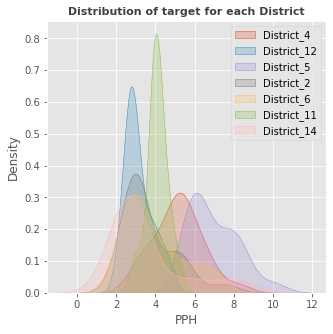

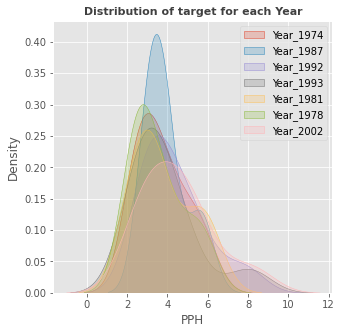

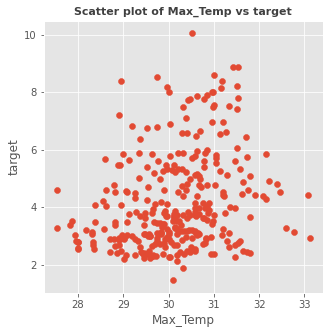

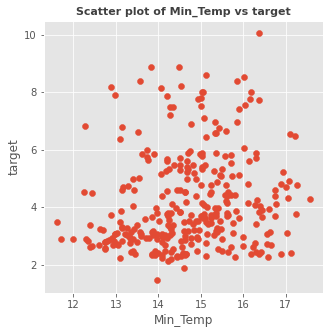

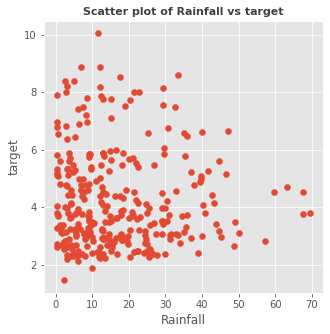

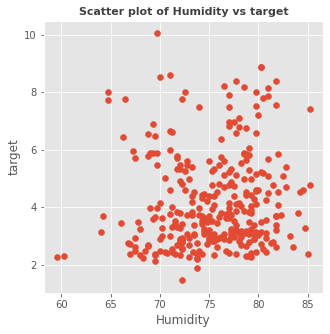

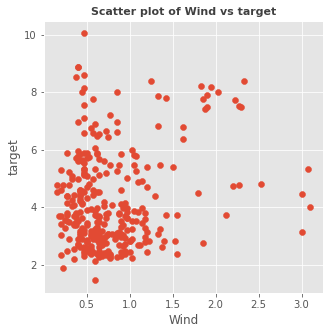

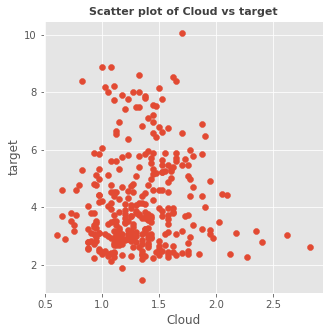

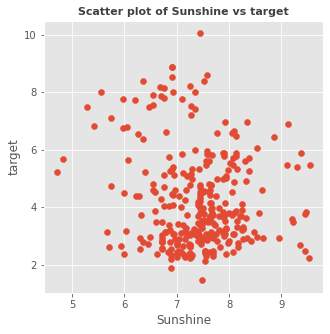

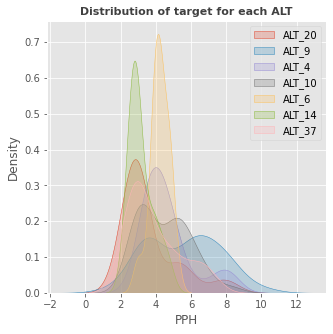

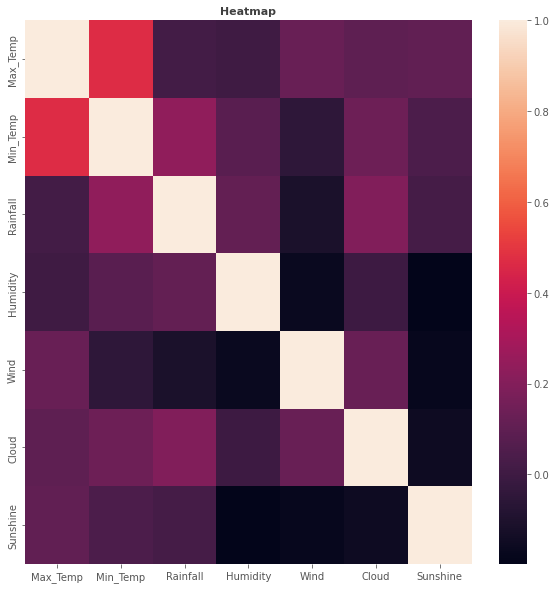

In [31]:
EDA.extensive_eda(X_train,y_valid,save_path="content/mljar-supervised/potato")

## Creating AutoML Models

In [32]:
automl = AutoML(mode='Compete',
                total_time_limit=10,
                results_path="AutoML_classifier/Potato")

In [33]:
automl.fit(X_train, y_valid)

This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.


In [34]:
predictions = automl.predict(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


#### a. RMSE

In [35]:
metrics.mean_squared_error(y_test, predictions)

1.20826038233904

#### b. MAE

In [36]:
metrics.mean_absolute_error(y_test, predictions)

0.7380278424822615

#### c. R2

In [37]:
metrics.r2_score(y_test, predictions)

0.5333453138330619

In [38]:
y_pred = automl.predict(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


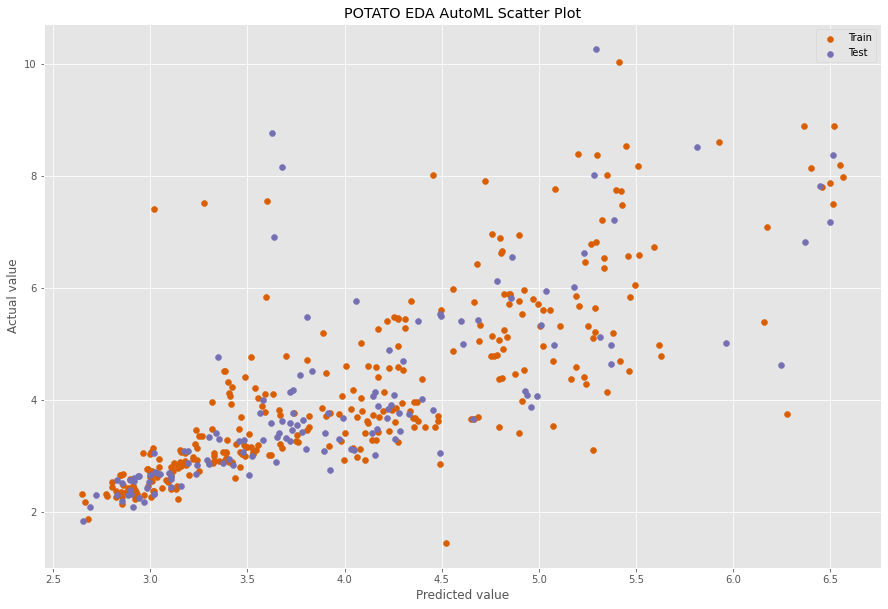

In [39]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_valid, label="Train", color='#d95f02')
plt.scatter(predictions, y_test, label="Test", color='#7570b3')
plt.title('POTATO EDA AutoML Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend()
plt.savefig("fig_content/potato_eda_automl_scatter.png")
plt.show()

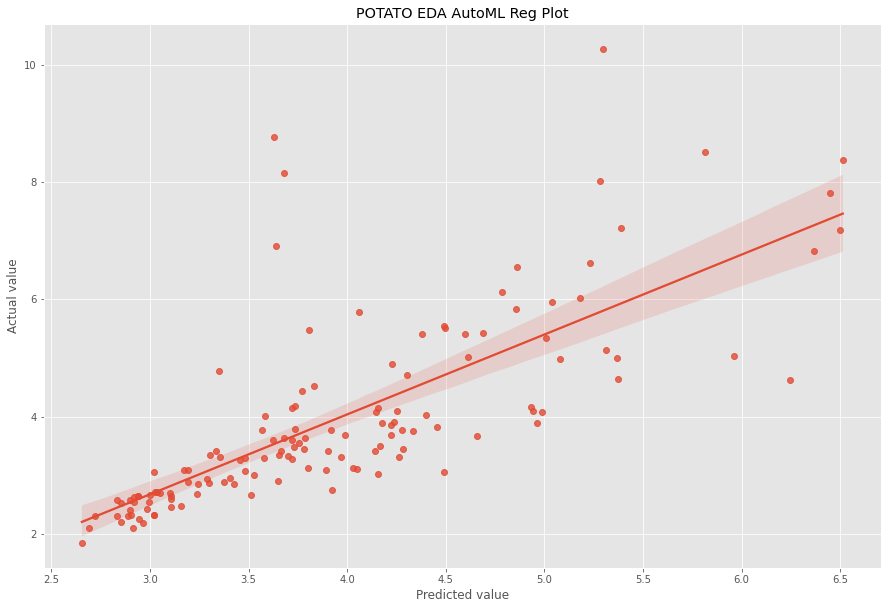

In [40]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y = y_test, data = data)
plt.title('POTATO EDA AutoML Reg Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("reg_content/potato_eda_automl_reg.png")

## 2. AutoSklearn Regression

In [41]:
autosk = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='autosklearn_regression/potato',
    resampling_strategy='holdout',
    resampling_strategy_arguments={'folds': 5},
)

In [42]:
autosk.fit(X_train, y_valid, dataset_name='data')

AutoSklearnRegressor(per_run_time_limit=30,
                     resampling_strategy_arguments={'folds': 5},
                     time_left_for_this_task=120,
                     tmp_folder='autosklearn_regression/potato')

In [43]:
autosk.leaderboard()

rank  ensemble_weight               type      cost  duration
model_id                                                              
11           1             0.40        extra_trees  0.242966  1.636214
8            2             0.20  gradient_boosting  0.274475  1.185060
14           3             0.24   gaussian_process  0.282137  5.425905
19           4             0.10   gaussian_process  0.370514  1.365632
31           5             0.06  gradient_boosting  0.527523  3.168217

In [44]:
print(autosk.show_models())

[(0.400000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'select_rates_regression', 'regressor:__choice__': 'extra_trees', 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.019566163649872924, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.7200608810425068, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.22968043330398744, 'feature_preprocessor:select_rates_regression:alpha': 0.18539282936320728, 'feature_preprocessor:select_rates_regression:mode': 'fwe', 'feature_preprocessor:select_rates_regression:score

In [45]:
predictions = autosk.predict(X_test)

#### a. RMSE

In [46]:
metrics.mean_squared_error(y_test, predictions)

0.9149617770408414

#### b. MAE

In [47]:
metrics.mean_absolute_error(y_test, predictions)

0.5979684125162605

#### c. R2

In [48]:
metrics.r2_score(y_test, predictions)

0.6466231888749219

In [49]:
y_pred = autosk.predict(X_train)

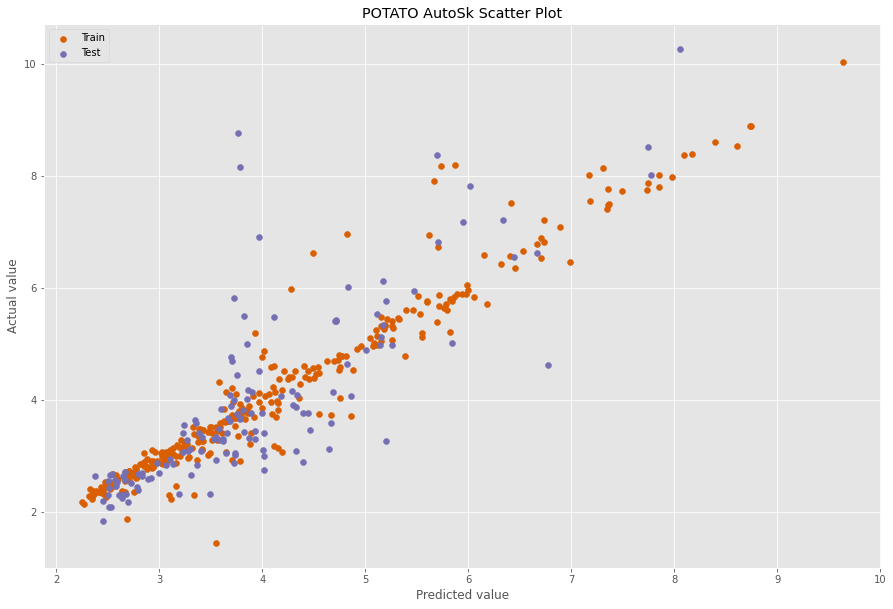

In [50]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_valid, label="Train", color='#d95f02')
plt.scatter(predictions, y_test, label="Test", color='#7570b3')
plt.title('POTATO AutoSk Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend()
plt.savefig("fig_content/potato_autosk_scatter.png")
plt.show()

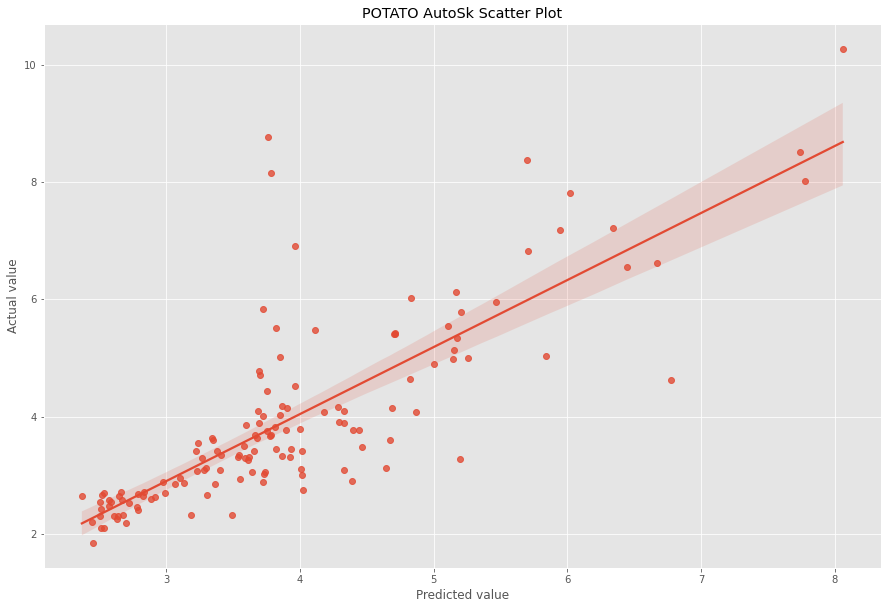

In [51]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y = y_test, data = data)
plt.title('POTATO AutoSk Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("reg_content/potato_autosk_reg.png")

## 3. AutoGluon

In [52]:
train_data = TabularDataset('dataset/Potato/train_data.csv')

In [53]:
test_data = TabularDataset('dataset/Potato/test_data.csv')

In [54]:
# Checking 0 values
(train_data == 0).sum(axis=0)
(test_data == 0).sum(axis=0)

District        0
Area            1
Year            0
Max_Temp        0
Min_Temp        0
Rainfall       12
Humidity        0
Wind            0
Cloud           0
Sunshine        0
ALT             0
Productions     1
PPH             0
dtype: int64

In [55]:
# Replace 0's with NaN
train_data.replace(0, np.nan, inplace=True)
test_data.replace(0, np.nan, inplace=True)

In [56]:
train_data.isnull().sum().sum()
test_data.isnull().sum().sum()

14

In [57]:
# Drop all NaN values
train_data = train_data.dropna()
train_data = train_data.reset_index(drop=True)
test_data = test_data.dropna()
test_data = test_data.reset_index(drop=True)

In [58]:
train_data.isnull().values.any()
test_data.isnull().values.any()

False

In [59]:
# Be ensure about 0's and NaN values
(train_data == 0).sum(axis=0)
(test_data == 0).sum(axis=0)

District       0
Area           0
Year           0
Max_Temp       0
Min_Temp       0
Rainfall       0
Humidity       0
Wind           0
Cloud          0
Sunshine       0
ALT            0
Productions    0
PPH            0
dtype: int64

In [60]:
train_data['Area'] = train_data.Area.astype(int)
train_data['Productions'] = train_data.Area.astype(int)
train_data['PPH'] = pd.to_numeric(train_data['PPH'])
test_data['Area'] = test_data.Area.astype(int)
test_data['Productions'] = test_data.Area.astype(int)
test_data['PPH'] = pd.to_numeric(test_data['PPH'])

In [61]:
label = 'PPH'

In [62]:
data[label].describe()

count    647.000000
mean       4.166654
std        1.706206
min        0.907532
25%        2.913789
50%        3.633333
75%        5.120772
max       10.333499
Name: PPH, dtype: float64

In [63]:
save_path = 'autogluon/potato'

In [64]:
hyperparameters = {
    'NN': {'num_epochs': 10, 'activation': 'relu', 'dropout_prob': ag.Real(0.0, 0.5)},
    'GBM': {'num_boost_round': 1000, 'learning_rate': ag.Real(0.01, 0.1, log=True)},
    'XGB': {'n_estimators': 1000, 'learning_rate': ag.Real(0.01, 0.1, log=True)}
}

In [65]:
predictor = TabularPredictor(label=label, path=save_path).fit(
    train_data, hyperparameters=hyperparameters, hyperparameter_tune_kwargs='auto', time_limit=60
)

[WARNING] [2021-09-19 00:04:29,040:autogluon.core.utils.utils] Warning: path already exists! This predictor may overwrite an existing predictor! path="autogluon/potato"
[WARNING] [2021-09-19 00:04:29,041:root] Warning: hyperparameter tuning is currently experimental and may cause the process to hang.


In [66]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.827116       0.069168  30.713526                0.000340           0.135227            2       True         13
1           LightGBM/T0  -0.840438       0.037444  12.156053                0.037444          12.156053            1       True          1
2            XGBoost/T0  -0.879823       0.028280  18.158557                0.028280          18.158557            1       True          2
3     NeuralNetMXNet/T9  -1.188397       0.003104   0.263688                0.003104           0.263688            1       True         12
4     NeuralNetMXNet/T8  -1.216078       0.002863   0.375038                0.002863           0.375038            1       True         11
5     NeuralNetMXNet/T2  -1.228536       0.004350   0.425437                0.004350           0.425437 

AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"


{'model_types': {'LightGBM/T0': 'LGBModel',
  'XGBoost/T0': 'XGBoostModel',
  'NeuralNetMXNet/T0': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T1': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T2': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T3': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T4': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T5': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T6': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T7': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T8': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T9': 'TabularNeuralNetModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T0': -0.8404380975388633,
  'XGBoost/T0': -0.8798231823496881,
  'NeuralNetMXNet/T0': -2.0000240802764893,
  'NeuralNetMXNet/T1': -1.31413733959198,
  'NeuralNetMXNet/T2': -1.2285360097885132,
  'NeuralNetMXNet/T3': -1.4476813077926636,
  'NeuralNetMXNet/T4': -1.2922735214233398,
  'NeuralNetMXNet/T5': -1.5999958515167236,
  'NeuralNetMXNet/T6': -2.335459709

In [67]:
perf = predictor.evaluate(test_data)

In [68]:
y_pred = predictor.predict_proba(test_data)

In [69]:
perf = predictor.evaluate_predictions(y_true=test_data[label], y_pred=y_pred, auxiliary_metrics=True)

In [70]:
perf

{'root_mean_squared_error': -2.2735853437381253,
 'mean_squared_error': -5.169190315260809,
 'mean_absolute_error': -1.756770963497814,
 'r2': -0.5635786441331241,
 'pearsonr': 0.41264152633953216,
 'median_absolute_error': -1.477029607679932}

## 4. Hyperopt

In [71]:
n_iter=10

In [72]:
num_folds=2

In [73]:
kf = KFold(n_splits=num_folds, random_state=None)

In [74]:
model = LGBMRegressor(random_state=42)

#### a. RMSE

In [75]:
abs(cross_val_score(model, X, y, scoring='neg_mean_squared_error')).mean()

1.6632082883137187

#### b. MAE

In [76]:
abs(cross_val_score(model, X, y, scoring='neg_mean_absolute_error')).mean()

0.8409318005484068

#### c. R2

In [77]:
abs(cross_val_score(model, X, y, scoring='r2')).mean()

0.5725040090987209

## 5. TPOT

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

In [79]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

In [80]:
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.0360535207907278

Generation 2 - Current best internal CV score: -1.005825251828458

Generation 3 - Current best internal CV score: -1.005825251828458

Generation 4 - Current best internal CV score: -1.005825251828458

Generation 5 - Current best internal CV score: -0.9149801933212698

Best pipeline: RandomForestRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.4, min_samples_leaf=1, min_samples_split=10, n_estimators=100), bootstrap=False, max_features=0.45, min_samples_leaf=11, min_samples_split=5, n_estimators=100)


TPOTRegressor(generations=5, population_size=50, random_state=42, verbosity=2)

In [81]:
predictions = tpot.predict(X_test)

#### b. RMSE

In [82]:
metrics.mean_squared_error(y_test, predictions)

0.8865413001840159

#### b. MAE

In [83]:
metrics.mean_absolute_error(y_test, predictions)

0.5570808471690551

#### c. R2

In [84]:
metrics.r2_score(y_test, predictions)

0.6498293933661901

In [85]:
y_pred = tpot.predict(X_train)

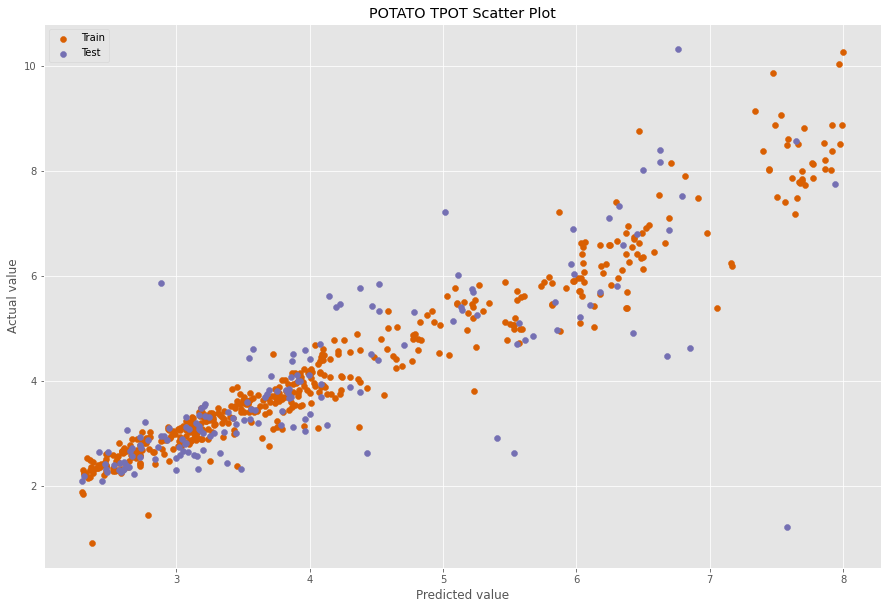

In [86]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_train, label="Train", color='#d95f02')
plt.scatter(predictions, y_test, label="Test", color='#7570b3')
plt.title('POTATO TPOT Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend()
plt.savefig("fig_content/potato_tpot_scatter.png")
plt.show()

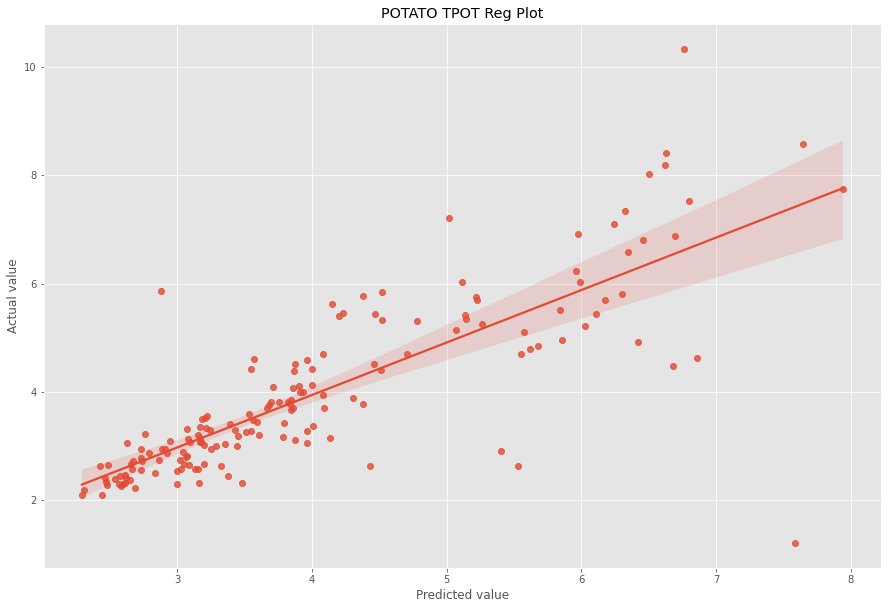

In [87]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y = y_test, data = data)
plt.title('POTATO TPOT Reg Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("reg_content/potato_tpot_reg.png")

## 6. EvalML => AutoMLSearch

In [88]:
import evalml
from evalml import AutoMLSearch

In [89]:
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(X, y, problem_type='regression', test_size=0.3, random_seed=0)

In [90]:
automl = AutoMLSearch(X_train = X_train, y_train=y_train, problem_type = "regression",max_batches=1,optimize_thresholds=True)
automl.search()

Parameters for components {'Baseline Classifier'} will not be used to instantiate the pipeline since they don't appear in the pipeline


In [91]:
automl.rankings

id                                      pipeline_name  search_order  \
0   3     XGBoost Regressor w/ Log Transformer + Imputer             3   
1   5  Random Forest Regressor w/ Log Transformer + I...             5   
2   2  Extra Trees Regressor w/ Log Transformer + Imp...             2   
3   7    LightGBM Regressor w/ Log Transformer + Imputer             7   
4   6  Decision Tree Regressor w/ Log Transformer + I...             6   
5   1  Elastic Net Regressor w/ Log Transformer + Imp...             1   
6   4    CatBoost Regressor w/ Log Transformer + Imputer             4   
7   0                  Mean Baseline Regression Pipeline             0   

   mean_cv_score  standard_deviation_cv_score  validation_score  \
0       0.564580                     0.084282          0.469187   
1       0.543011                     0.032956          0.523644   
2       0.530520                     0.047181          0.504456   
3       0.512563                     0.073574          0.465496   
4       0.352351                     0.114994          0.447715   
5       0.231795                     0.078978          0.151646   
6       0.086200                     0.054855          0.047196   
7      -0.021992                     0.021459         -0.012579   

   percent_better_than_baseline  high_variance_cv  \
0                   2667.153042             False   
1                   2569.080216             False   
2                   2512.281552             False   
3                   2430.633601             False   
4                   1702.146284             False   
5                   1153.977398             False   
6                    491.950706             False   
7                      0.000000             False   

                                          parameters  
0  {'Imputer': {'categorical_impute_strategy': 'm...  
1  {'Imputer': {'categorical_impute_strategy': 'm...  
2  {'Imputer': {'categorical_impute_strategy': 'm...  
3  {'Imputer': {'categorical_impute_strategy': 'm...  
4  {'Imputer': {'categorical_impute_strategy': 'm...  
5  {'Imputer': {'categorical_impute_strategy': 'm...  
6  {'Imputer': {'categorical_impute_strategy': 'm...  
7       {'Baseline Regressor': {'strategy': 'mean'}}

In [92]:
best_pipeline = automl.best_pipeline
best_pipeline

pipeline = RegressionPipeline(component_graph={'Log Transformer': ['Log Transformer', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Log Transformer.y'], 'XGBoost Regressor': ['XGBoost Regressor', 'Imputer.x', 'Log Transformer.y']}, parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'XGBoost Regressor':{'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1}}, random_seed=0)

In [93]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


**************************************************
* XGBoost Regressor w/ Log Transformer + Imputer *
**************************************************

Problem Type: regression
Model Family: XGBoost

Pipeline Steps
1. Log Transformer
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. XGBoost Regressor
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100
	 * n_jobs : -1

Training
Training for regression problems.
Total training time (including CV): 0.7 seconds

Cross Validation
----------------
               R2  ExpVariance  MaxError  MedianAE   MSE   MAE  Root Mean Squared Error # Training # Validation
0           0.469        0.482     6.105     0.459 1.610 0.807                    1.269        301          151
1           0.629        0.629     6.881     0.263 0.944 0.516                    0.972        301          151
2           0.596        

In [94]:
automl.describe_pipeline(1)


************************************************************************
* Elastic Net Regressor w/ Log Transformer + Imputer + Standard Scaler *
************************************************************************

Problem Type: regression
Model Family: Linear

Pipeline Steps
1. Log Transformer
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. Standard Scaler
4. Elastic Net Regressor
	 * alpha : 0.0001
	 * l1_ratio : 0.15
	 * max_iter : 1000
	 * normalize : False

Training
Training for regression problems.
Total training time (including CV): 0.3 seconds

Cross Validation
----------------
               R2  ExpVariance  MaxError  MedianAE   MSE   MAE  Root Mean Squared Error # Training # Validation
0           0.152        0.186     5.080     0.876 2.573 1.199                    1.604        301          151
1           0.310        0.311     5.180     0.869 1.756 1.000  

In [95]:
automl.results

{'pipeline_results': {0: {'id': 0,
   'pipeline_name': 'Mean Baseline Regression Pipeline',
   'pipeline_class': evalml.pipelines.regression_pipeline.RegressionPipeline,
   'pipeline_summary': 'Baseline Regressor',
   'parameters': {'Baseline Regressor': {'strategy': 'mean'}},
   'mean_cv_score': -0.021992452166160525,
   'standard_deviation_cv_score': 0.021458914223104655,
   'high_variance_cv': False,
   'training_time': 0.051186561584472656,
   'cv_data': [{'all_objective_scores': OrderedDict([('R2',
                   -0.012579236757576329),
                  ('ExpVariance', 0.0),
                  ('MaxError', 5.098920326405315),
                  ('MedianAE', 1.1134879015946844),
                  ('MSE', 3.0707017682595064),
                  ('MAE', 1.3435810813141404),
                  ('Root Mean Squared Error', 1.7523417955009537),
                  ('# Training', 301),
                  ('# Validation', 151)]),
     'mean_cv_score': -0.012579236757576329,
     'binary_clas

In [96]:
evalml.objectives.get_all_objective_names()

['expvariance',
 'maxerror',
 'medianae',
 'mse',
 'mae',
 'r2',
 'mean squared log error',
 'root mean squared log error',
 'root mean squared error',
 'mean absolute percentage error',
 'mcc multiclass',
 'log loss multiclass',
 'auc weighted',
 'auc macro',
 'auc micro',
 'recall weighted',
 'recall macro',
 'recall micro',
 'precision weighted',
 'precision macro',
 'precision micro',
 'f1 weighted',
 'f1 macro',
 'f1 micro',
 'balanced accuracy multiclass',
 'accuracy multiclass',
 'mcc binary',
 'log loss binary',
 'gini',
 'auc',
 'recall',
 'precision',
 'f1',
 'balanced accuracy binary',
 'accuracy binary',
 'sensitivity at low alert rates',
 'lead scoring',
 'fraud cost',
 'cost benefit matrix']

## Graphical Representation

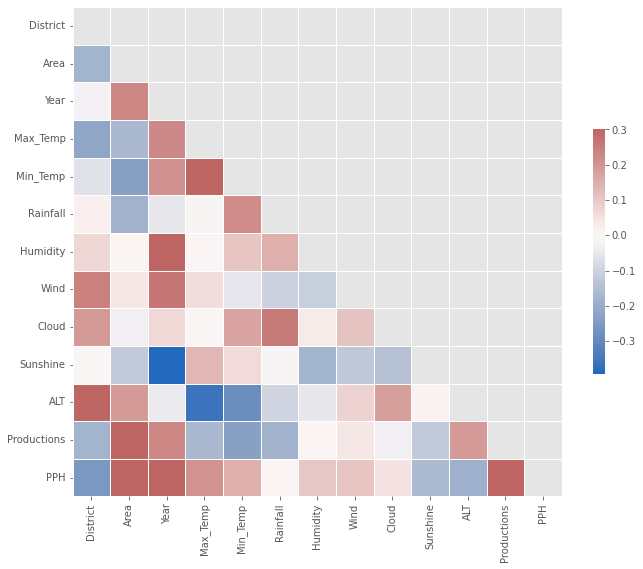

In [97]:
correlation_data=data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

<Figure size 720x720 with 0 Axes>

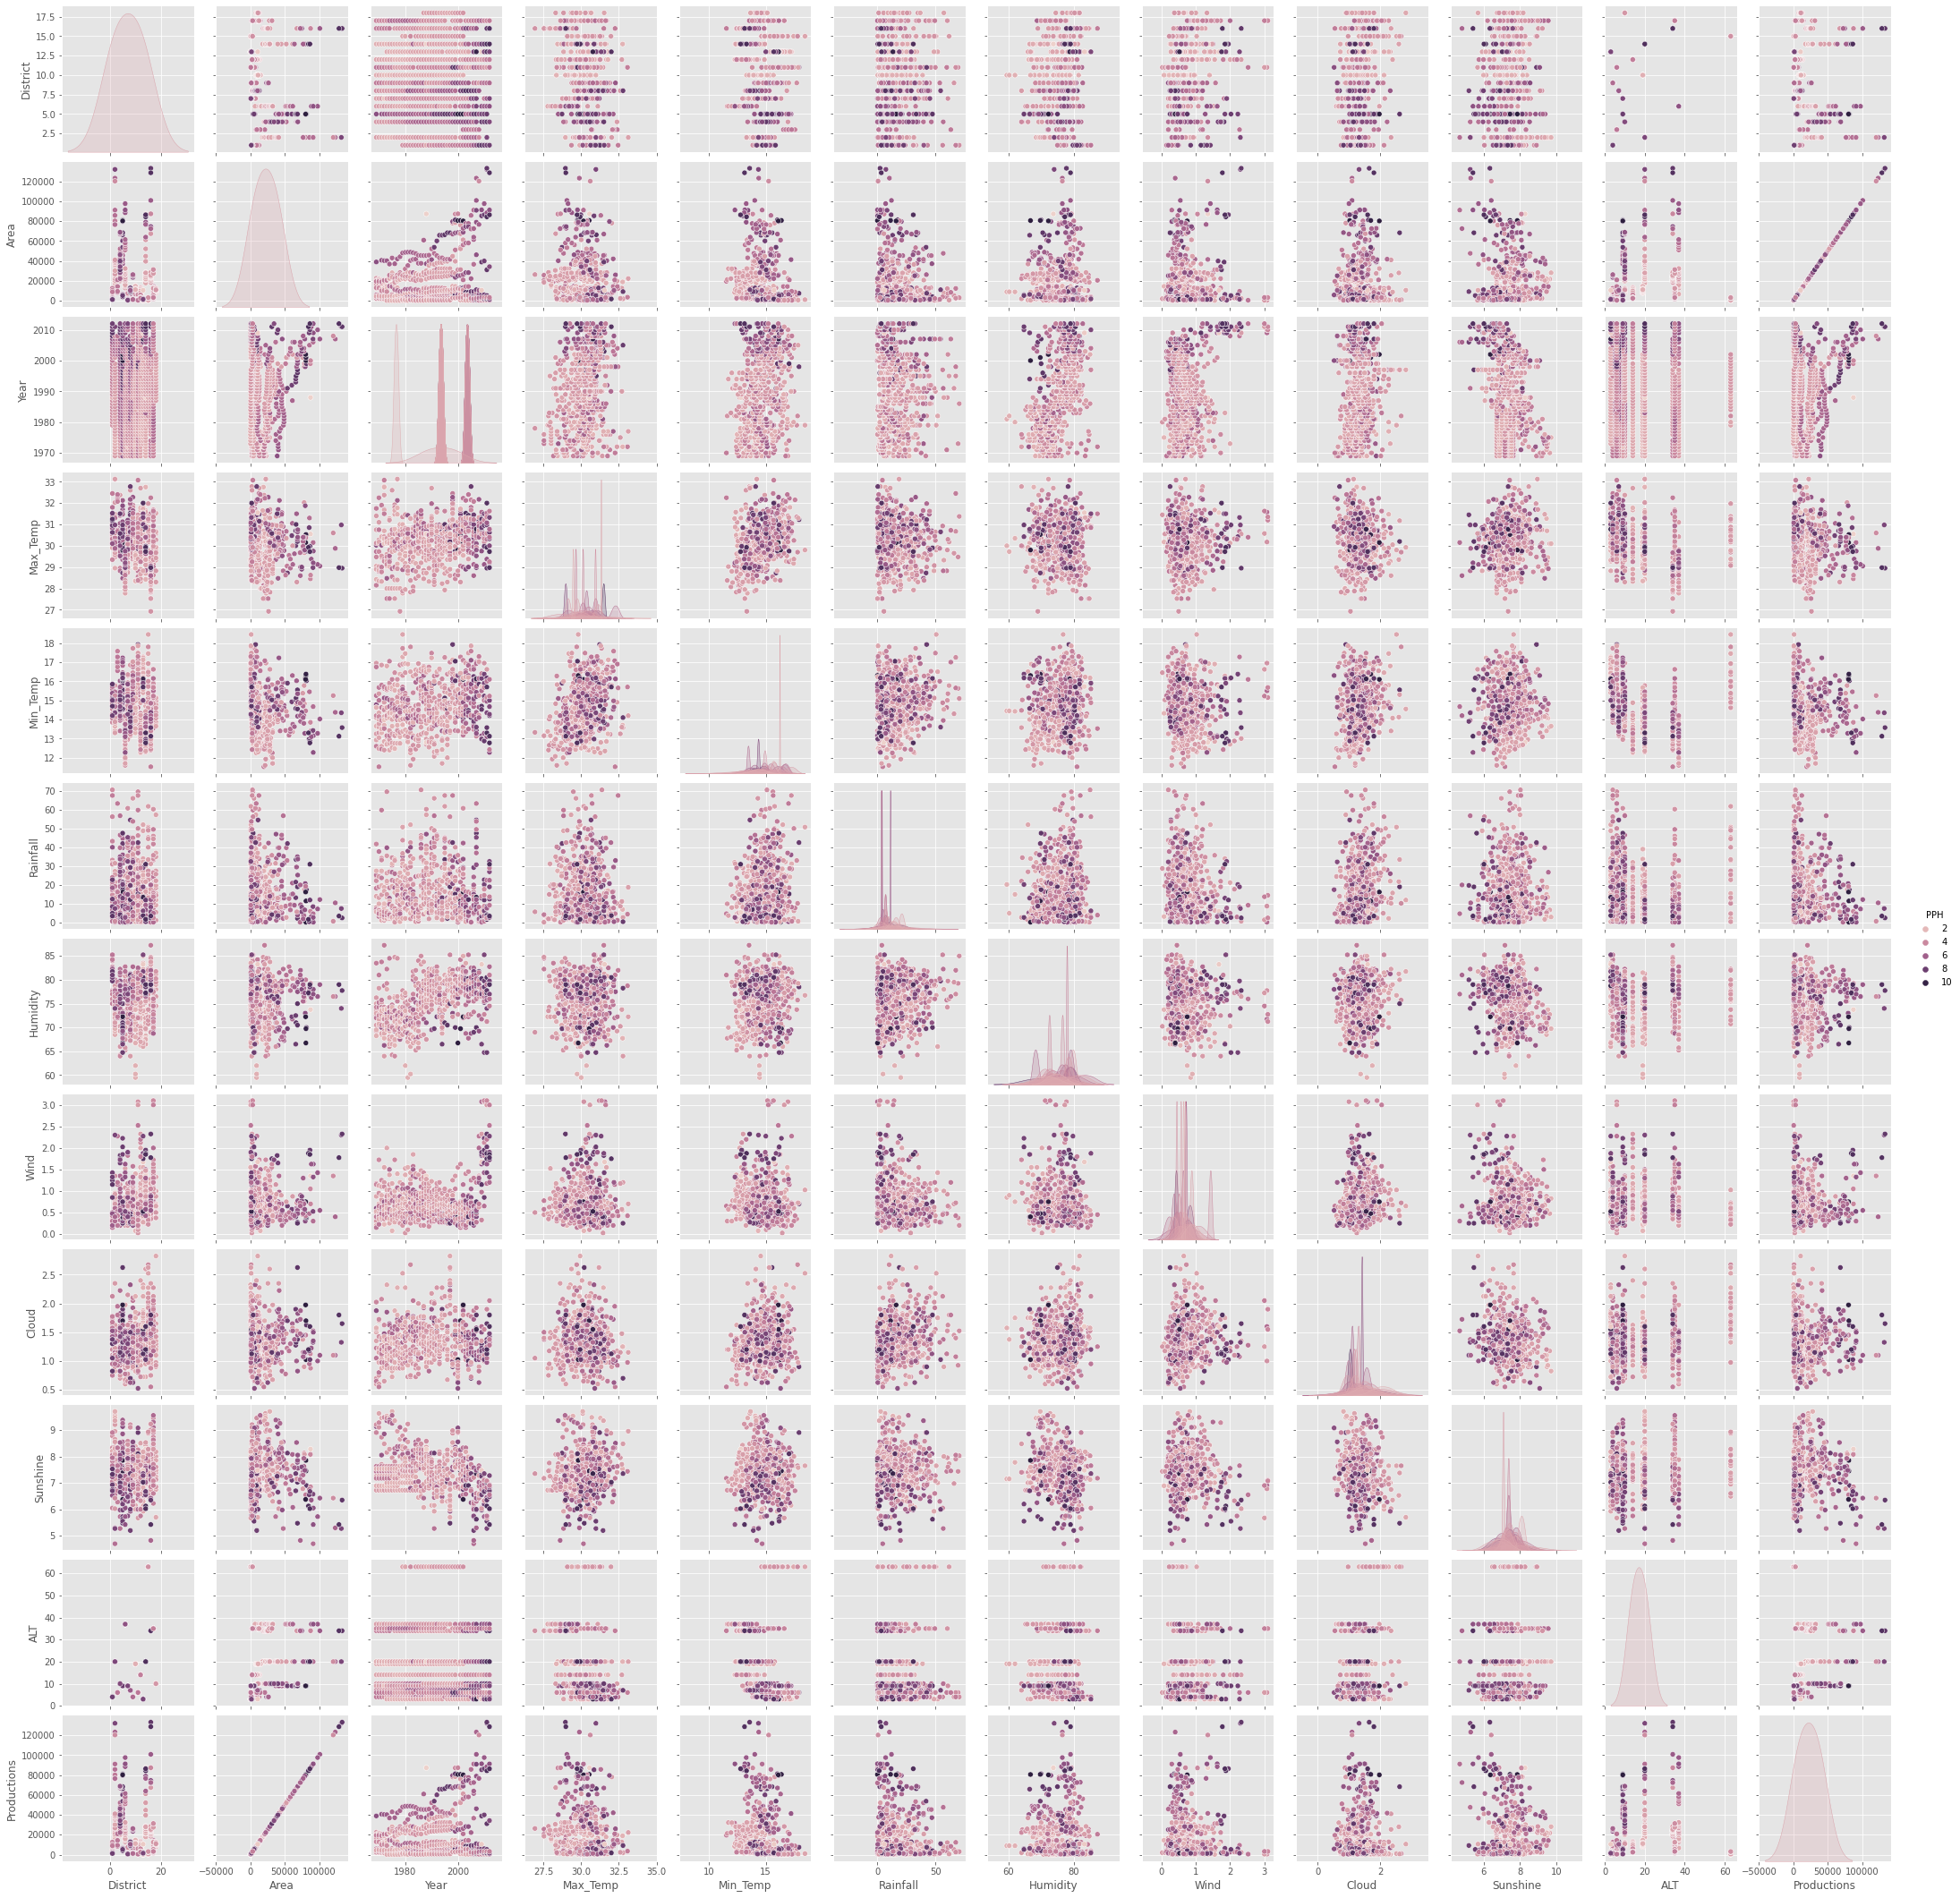

In [98]:
plt.figure(figsize=(10, 10))
sns.pairplot(data, hue='PPH');

In [99]:
pio.templates.default = "seaborn"
plt.figure(figsize=(16, 16))
fig = px.line(data, x = "Year", y = "Rainfall", color = "Year")
fig.show()

<Figure size 1152x1152 with 0 Axes>

In [100]:
pio.templates.default = "seaborn"
plt.figure(figsize=(10, 10))
fig = px.line(data, x = "Cloud", y = "Rainfall", color = "Cloud")
fig.show()

<Figure size 720x720 with 0 Axes>

In [101]:
pio.templates.default = "seaborn"
plt.figure(figsize=(16, 16))
fig = px.line(data, x = "Humidity", y = "Rainfall", color = "Humidity")
fig.show()

<Figure size 1152x1152 with 0 Axes>

In [102]:
pio.templates.default = "seaborn"
plt.figure(figsize=(16, 16))
fig = px.line(data, x = "Year", y = "PPH", color = "Year")
fig.show()

<Figure size 1152x1152 with 0 Axes>